In [1]:
import numpy as np
import pandas as pd
import math
import scipy.io as sio
import random

from tensortools.operations import unfold as tt_unfold, khatri_rao
import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac

In [2]:
#" Import .mat datafile using scipy.io"
df = sio.loadmat('aminoacid.mat')

In [3]:
"Getting X as numpy array from weird Matlab Object structure-.-"
X = df['X'][0][0][0]

In [4]:
"Concentration matrix of 3 amino acids: tyrosine, tryptophan, and phenylanine in 5 differenct lab samples"
Y = df['Y']
np.random.seed(10)

In [11]:
def cp_decomposition(tensor, rank, max_iter=501, verbose=False):

    a = np.random.random((rank, tensor.shape[0]))
    b = np.random.random((rank, tensor.shape[1]))
    c = np.random.random((rank, tensor.shape[2]))

    for epoch in range(max_iter):
        # optimize a
        input_a = khatri_rao([b.T, c.T])
        X0 = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(X0))

        # optimize b
        input_b = khatri_rao([a.T, c.T])
        X1 = tl.unfold(tensor, mode=1).T
        b = np.linalg.solve(input_b.T.dot(input_b), input_b.T.dot(X1))

        # optimize c
        input_c = khatri_rao([a.T, b.T])
        X2 = tl.unfold(tensor, mode=2).T
        c = np.linalg.solve(input_c.T.dot(input_c), input_c.T.dot(X2))

        if verbose and epoch % int(max_iter * .2) == 0:
            res_a = np.square(input_a.dot(a) - X0)
            res_b = np.square(input_b.dot(b) - X1)
            res_c = np.square(input_c.dot(c) - X2)
            print("Epoch:", epoch, "| Loss (C):", res_a.mean(), "| Loss (B):", res_b.mean(), "| Loss (C):", res_c.mean())

    return a.T, b.T, c.T

In [12]:
(A, B, C)= cp_decomposition(X, rank =3)

In [14]:
Y[:,0] = Y[:,0]/np.linalg.norm(Y[:,0])
Y[:,1] = Y[:,1]/np.linalg.norm(Y[:,1])
Y[:,2] = Y[:,2]/np.linalg.norm(Y[:,2])

In [15]:
A[:,0] = A[:,0]/np.linalg.norm(A[:,0])
A[:,1] = A[:,1]/np.linalg.norm(A[:,1])
A[:,2] = A[:,2]/np.linalg.norm(A[:,2])

In [16]:
Y

array([[0.82801382, 0.        , 0.        ],
       [0.        , 0.88500912, 0.        ],
       [0.        , 0.        , 0.88928899],
       [0.48998571, 0.36198869, 0.3507751 ],
       [0.27259331, 0.29278497, 0.29346537]])

In [17]:
A

array([[ 8.32124738e-01, -5.49468608e-03, -1.96934471e-03],
       [ 4.27552103e-03,  8.85916902e-01,  2.90684818e-04],
       [ 1.46770447e-02,  9.98320003e-03,  8.66280948e-01],
       [ 4.81898387e-01,  3.56919216e-01,  3.77028623e-01],
       [ 2.74059609e-01,  2.96023750e-01,  3.27723623e-01]])

In [18]:
""" The 5x3 score matrix A gotten cp_decomposition algorithm is close to the concentration matrix Y"""

' The 5x3 score matrix A gotten cp_decomposition algorithm is close to the concentration matrix Y'

In [20]:
emission_range = range(250,451, 1)

In [21]:
excitation_range = range(240,301,1)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Signal')

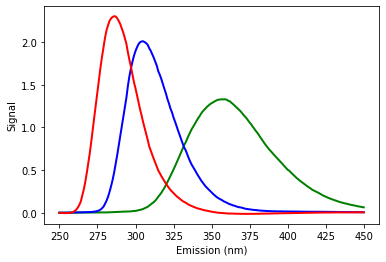

In [24]:
plt.plot(emission_range, B[:,0], color="green", linewidth =2, label ="Tyrosine")
plt.plot(emission_range, B[:,1], color = "blue", linewidth =2, label ="Tryptophan")
plt.plot(emission_range, B[:,2], color = "red", linewidth =2, label ="phenylanine")
plt.xlabel("Emission (nm)")
plt.ylabel("Signal")


Text(0, 0.5, 'Signal')

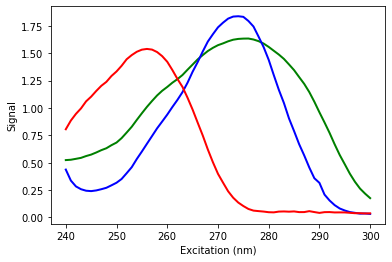

In [25]:
plt.plot(excitation_range, C[:,0], color="green", linewidth =2, label ="Tyrosine")
plt.plot(excitation_range, C[:,1], color = "blue", linewidth =2, label ="Tryptophan")
plt.plot(excitation_range, C[:,2], color = "red", linewidth =2, label ="phenylanine")
plt.xlabel("Excitation (nm)")
plt.ylabel("Signal")

In [26]:
"""By decomposing information of 5 tests containing diffrent amount of tyrosine, tryptophan, and phenylanine,
we can seperate out the unique emission and excitation spectrum of each amino acid on spectrofluorometer"""

'By decomposing information of 5 tests containing diffrent amount of tyrosine, tryptophan, and phenylanine,\nwe can seperate out the unique emission and excitation spectrum of each amino acid on spectrofluorometer'